In [2]:
system_message_1 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). 

1. **Identify Primary Variables**  
   - First, read through the original input text carefully.  
   - Extract all key entities or components (e.g., “salesmen,” “orders,” “product delivery,” “revenue,” etc.).  
   - If certain variables overlap or share commonalities, group them thematically (e.g., “sales workforce,” “budget,” “capacity,” etc.).  

2. **Break Down Sub-Factors**  
   - Within each primary variable, look for nuanced factors that might influence or be influenced by others (e.g., “delivery delay,” “acquisition delay,” “order backlog”).  
---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Chickens**  
2. **Eggs**  
3. **Road Crossings**  
4. **Traffic**  

---

### Step 2: Break Down Sub-Factors  

For each primary variable, here are the nuanced sub-factors:  

1. **Chickens**  
   - Chicken population size  
   - Chickens attempting to cross roads  

2. **Eggs**  
   - Number of eggs laid  
   - Rate of eggs hatching  

3. **Road Crossings**  
   - Frequency of road crossing attempts by chickens  
   - Success rate of road crossings  

4. **Traffic**  
   - Presence of traffic  
   - Severity or density of traffic impacting road crossings  

Let me know if you'd like further refinement of these factors or additional steps for mapping the causal relationships.

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Salesmen**  
2. **Orders Booked**  
3. **Order Backlog**  
4. **Delivery Delay**  
5. **Product Attractiveness**  
6. **Order Rate**  
7. **Revenue**  
8. **Sales Budget**  
9. **Production Capacity**  
10. **Acquisition Delay**  

---

### Step 2: Break Down Sub-Factors  

For each primary variable, here are the nuanced sub-factors:  

1. **Salesmen**  
   - Number of salesmen  
   - Sales effort exerted  

2. **Orders Booked**  
   - Total number of orders booked  
   - Rate at which orders are booked  

3. **Order Backlog**  
   - Accumulation of unfulfilled orders  
   - Rate of backlog clearance  

4. **Delivery Delay**  
   - Time taken to fulfill orders  
   - Dependency on production capacity  

5. **Product Attractiveness**  
   - Perceived value of the product  
   - Sensitivity to delivery delay  

6. **Order Rate**  
   - Frequency of new orders placed  
   - Dependency on product attractiveness  

7. **Revenue**  
   - Income generated from delivered orders  
   - Dependency on order fulfillment  

8. **Sales Budget**  
   - Allocation of funds for sales operations  
   - Dependency on revenue  

9. **Production Capacity**  
   - Total capacity to produce and fulfill orders  
   - Dependency on acquisition of new capacity  

10. **Acquisition Delay**  
   - Time taken to procure and integrate new production capacity  
   - Dependency on capacity orders  
"""

In [3]:
system_message_2 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). Follow these steps:

3. **Map Causal Relationships**  
   - For each pair of related variables, specify the relationship in the following format:  
     \[
       [Variable A] --> ([+/-]) [Variable B]
     \]  
     Use **(+)** if an increase in Variable A leads to an increase in Variable B. Use **(-)** if an increase in Variable A leads to a decrease in Variable B.  
   - Provide your **Reasoning** next: Explain how you determined the relationship. If something in the original text supports or illustrates this cause-effect linkage, reference it.  
   - Under **Relevant Text**, include the **exact sentence(s) or phrase(s)** from the original input text that justifies your relationship. Enclose these quotes clearly (e.g., in quotation marks).


---

**Output Format**

For each relationship, follow this exact template:

1. **[Variable A] --> ([+/-]) [Variable B]**  
   **Reasoning:** [Explanation of how/why the relationship is positive or negative, referencing delays and any loops if applicable.]  
   **Relevant Text:** [Exact quote(s) from the original text that substantiate this relationship.]

---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
1. chickens --> (+) eggs  
   Reasoning: Increased chickens lead to more eggs being laid.  
   Relevant Text: "More chickens lay more eggs..."

2. eggs --> (+) chickens  
   Reasoning: Eggs hatch into chickens, thus increasing the chicken population.  
   Relevant Text: "...which hatch and add to the chicken population."

3. road crossing --> (-) chickens  
   Reasoning: More chickens crossing roads, combined with traffic, can lead to a decreased chicken population.  
   Relevant Text: "If there is any traffic, more road crossings will lead to fewer chickens."

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
1. Salesmen --> (+) Orders booked
Reasoning: Salesmen are responsible for booking orders which lead to
revenue generation.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
2. Revenue --> (+) Sales budget
Reasoning: Revenue generated from orders booked contributes to the
sales budget.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
3. Sales budget --> (+) Salesmen
Reasoning: The sales budget allows for the hiring of more salesmen,
expanding the sales effort.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
4. Orders booked --> (+) Order backlog
Reasoning: Orders booked contribute to the order backlog.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
5. Order backlog --> (+) Delivery delay
Reasoning: An increase in order backlog leads to longer delivery
delays.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
6. Delivery delay --> (-) Product attractiveness
Reasoning: Longer delivery delays make the product less attractive to
customers.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
7. Product attractiveness --> (-) Order rate
Reasoning: Reduced product attractiveness leads to a decrease in the
order rate.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
8. Delivery delay --> (+) Capacity orders
Reasoning: The decision to order new production capacity is based on
the current delivery delay.
Relevant Text: The ordering of new production capacity is a function of
delivery delay only.
9. Delivery delay --> (+) Capacity orders
Reasoning: Delivery delay is used as an indicator of inadequate
capacity, prompting orders for more capacity.
Relevant Text: Rising order backlog, as indicated by delivery delay, is
taken as an indication of inadequate capacity, and orders for more
capacity are placed.
10. Capacity orders --> (+) Production capacity
Reasoning: After an acquisition delay, the ordered capacity adds to the
existing production capacity.
Relevant Text: These orders, after an acquisition delay, add to the
production capacity.
11. Delivery delay --> (+) Production capacity
Reasoning: As delivery delay increases, production capacity is raised
to reduce the delivery delay.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
12. Production capacity --> (-) Delivery delay
Reasoning: Increased production capacity should reduce the delivery
delay.
Relevant Text: As the delivery delay rises, production capacity is
raised to bring down the delivery delay.
13. Order rate --> (-) Orders booked
Reasoning: Decreased order rate leads to fewer orders booked.
Relevant Text: Orders booked increase the order backlog which increases
the delivery delay which makes the product less attractive and reduces
the order rate.
14. Orders booked --> (-) Revenue
Reasoning: Fewer orders booked would lead to a decrease in revenue.
Relevant Text: Here is a situation in which salesmen book orders
followed by product delivery which generates revenue which produces the
sales budget which permits hiring still more salesmen.
"""

In [4]:
system_message_3 = r"""
You are a systems engineer tasked with analyzing text to identify variables and their causal relationships for constructing a Causal Loop Diagram (CLD). Follow these steps:

4. **Add Feedback Loops**  
   - Identify any cyclical cause-effect paths (e.g., “salesmen → revenue → budget → more salesmen”).  
   - Label loops as either *Reinforcing (R)* or *Balancing (B)*, depending on whether they amplify or stabilize the system.  
   - Include a short note on how the loop works overall, mentioning how the sign of relationships causes growth (reinforcing) or equilibrium (balancing).  

5. **Account for Delays**  
   - If the text mentions time delays in processes (e.g., “acquisition delay,” “delivery delay”), highlight them.  
   - Explain how delays might shift or weaken the speed of the feedback loop’s response.  

6. **Suggest Interventions**  
   - Based on the relationships identified, propose one or more policy or managerial interventions that could alter the system’s outcome (e.g., “shorten acquisition delay,” “increase capacity earlier”).  

---

**Output Format**

For each relationship, follow this exact template:

- A consolidated **Feedback Loops** section, listing and labeling each loop (e.g., Loop R1, Loop B1) and a brief explanation of how it reinforces or balances the system.  
- A brief note on **Delays**, describing their impact on the system.  
- **Suggestions** or recommended interventions.  

---

### Example of How to Apply This Prompt

Example 1:
**Input Excerpt**  
```
"More chickens lay more eggs, which hatch and add to the chicken population.
The more chickens, the more road crossing they will attempt. If there is any
traffic, more road crossings will lead to fewer chickens."
```

**Output**  
Feedback Loops

    Loop R1 (Reinforcing):
    Path: chickens → (+) eggs → (+) chickens
    Explanation: This reinforcing loop demonstrates growth in the chicken population as more chickens lay eggs, which hatch and further increase the population.

    Loop B1 (Balancing):
    Path: chickens → (+) road crossing → (-) chickens
    Explanation: This balancing loop acts to stabilize or decrease the chicken population. As the number of chickens grows, road crossings increase, and traffic reduces the chicken population.

Delays

There may be a time delay between:

    Eggs being laid and chickens hatching. This delay slows the impact of the reinforcing loop (R1).
    Chickens crossing roads and the population being reduced due to traffic. This could introduce a lag in the balancing loop (B1).

Suggestions

    Minimize Road Crossing: Implement barriers or safe crossing zones to reduce traffic-related chicken losses.
    Manage Population Growth: Introduce measures to control the chicken population (e.g., regulating egg production) to avoid overpopulation and excessive road crossings.

Example 2:

**Input Excerpt**  
```
"Here is a situation in which salesmen book orders followed by
product delivery which generates revenue which produces the sales
budget which permits hiring still more salesmen. In short, salesmen
produce revenue to pay for the further expansion of the sales
effort. Orders booked increase the order backlog which increases the
delivery delay which makes the product less attractive and reduces
the order rate. The ordering of new production capacity is a
function of delivery delay only. Rising order backlog, as indicated
by delivery delay, is taken as an indication of inadequate capacity,
and orders for more capacity are placed. These orders, after an
acquisition delay, add to the production capacity. As the delivery
delay rises, production capacity is raised to bring down the
delivery delay."
```

**Output**  
Feedback Loops

    Loop R1 (Reinforcing): Sales Effort Expansion
    Path: salesmen → (+) orders booked → (+) revenue → (+) sales budget → (+) salesmen
    Explanation: This reinforcing loop shows how sales revenue funds the hiring of more salesmen, leading to further growth in sales.

    Loop B1 (Balancing): Delivery Delay Impact on Orders
    Path: orders booked → (+) order backlog → (+) delivery delay → (-) order rate → (-) orders booked
    Explanation: This balancing loop highlights how rising delivery delays reduce the order rate, limiting further growth in orders.

    Loop B2 (Balancing): Capacity Adjustment
    Path: delivery delay → (+) production capacity orders → (+) production capacity (after delay) → (-) delivery delay
    Explanation: This balancing loop regulates delivery delay by adjusting production capacity.

Delays

    Acquisition Delay: There is a delay between placing orders for new production capacity and when it becomes operational.
    Delivery Delay: Time is required to clear the backlog of orders, impacting customer satisfaction and order rates.

Suggestions

    Improve Delivery Times: Invest in production process optimization to reduce delivery delays and retain customer interest.
    Forecast Capacity Needs: Use predictive analytics to anticipate production needs and order capacity proactively, reducing dependency on reactionary measures.
    Balance Sales Growth with Delivery Efficiency: Ensure that sales growth does not outpace production capacity to avoid excessive delivery delays.
"""

In [6]:
# List of system messages for easier looping
system_messages = [system_message_1, system_message_2, system_message_3]


In [8]:
case = r"""
    Patient Information

    Patient Name: Mr. Smith
    Patient ID: 789456
    Date of Birth: 06/25/1965
    Date of Examination: 03/15/2024

MRI Examination Details

    MRI Technique: Multi-parametric MRI with T2-weighted images, diffusion-weighted imaging (DWI), and dynamic contrast-enhanced (DCE) MRI.
    Prostate Volume: 45 cc
    PSA Level: 5.8 ng/mL

MRI Findings

    Lesion 1: Located in the left peripheral zone, mid gland. It shows significant restricted diffusion with a corresponding low ADC value and focal early enhancement on DCE MRI. PI-RADS Score: 5.
    Lesion 2: Located in the right peripheral zone, apex. It has mildly restricted diffusion and no significant enhancement on DCE MRI. PI-RADS Score: 3.
    Lesion 3: Located in the anterior fibromuscular stroma, showing moderate restricted diffusion and no early enhancement. PI-RADS Score: 3."""

In [25]:
from openai import OpenAI

# Define the function
def process_case_study(case_study, system_messages, model="chatgpt-4o-latest", temperature=0.1):
    """
    Process a case study through a series of chained prompts using OpenAI's API.
    
    Parameters:
    - case_study (str): The case study text to process.
    - system_messages (list): List of system messages to structure the prompts.
    - model (str): The GPT model to use. Default is "chatgpt-4o-latest".
    - temperature (float): The creativity level of the model's responses. Default is 0.1.
    
    Returns:
    - dict: A dictionary containing responses for each stage and the final output.
    """
    # Initialize the messages and responses
    messages = []
    responses = {}

    client = OpenAI()

    # Loop through the system messages
    for i, system_message in enumerate(system_messages, start=1):
        # Update messages for the current stage
        if i == 1:
            messages = [
                {"role": "system", "content": system_message},
                {"role": "user", "content": case_study},
            ]
        else:
            messages = [
                {"role": "system", "content": system_message},
                {"role": "user", "content": case_study + "".join(responses[f"Stage_{j}"] for j in range(1, i))},
            ]

        # Make the API call
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature,
        )

        # Extract the response content
        assistant_reply = response.choices[0].message.content
        responses[f"Stage_{i}"] = assistant_reply

    # Combine all responses for the final output
    final_output = case_study + "".join(responses.values())
    responses["Final_Output"] = final_output

    return responses


In [26]:
# Call the function
responses = process_case_study(case, system_messages)

# Print the final output
print("Final Output:\n", responses["Final_Output"])

Final Output:
 
    Patient Information

    Patient Name: Mr. Smith
    Patient ID: 789456
    Date of Birth: 06/25/1965
    Date of Examination: 03/15/2024

MRI Examination Details

    MRI Technique: Multi-parametric MRI with T2-weighted images, diffusion-weighted imaging (DWI), and dynamic contrast-enhanced (DCE) MRI.
    Prostate Volume: 45 cc
    PSA Level: 5.8 ng/mL

MRI Findings

    Lesion 1: Located in the left peripheral zone, mid gland. It shows significant restricted diffusion with a corresponding low ADC value and focal early enhancement on DCE MRI. PI-RADS Score: 5.
    Lesion 2: Located in the right peripheral zone, apex. It has mildly restricted diffusion and no significant enhancement on DCE MRI. PI-RADS Score: 3.
    Lesion 3: Located in the anterior fibromuscular stroma, showing moderate restricted diffusion and no early enhancement. PI-RADS Score: 3.### Step 1: Identify Primary Variables  
The key entities or components in the text are:  

1. **Patient Information*

In [41]:
def call_openai_for_cld(responses):
    """
    Use OpenAI API to extract causal relationships and feedback loops.
    """
    # Define system prompt for extracting Graphviz-compatible data
    system_message_out = r'''
	You are an expert in generating Graphviz scripts to visualize causal relationships in a Causal Loop Diagram (CLD). 
	
	Follow these steps:
	
	1. **Extract Relationships**:
	   - Identify causal relationships from the provided text.
	   - Each relationship should include a source node, a target node, and an edge sign (e.g., (+) or (-)).
	
	2. **Identify Feedback Loops**:
	   - Detect reinforcing (R) or balancing (B) loops in the relationships.
	   - Clearly label the loops in the Graphviz diagram.
	
	3. **Generate a Graphviz Script**:
	   - Use the `digraph` format to create a Graphviz script that visualizes the causal relationships and feedback loops.
	   - Ensure nodes are connected with directional arrows and labeled with the sign of the relationship (+ or -).
	   - Clearly label each feedback loop (e.g., `Loop R1`, `Loop B1`) near the relevant relationships.
	
	4. **Output Format**:
	   digraph CausalLoopDiagram {rankdir=LR; // Optional: Left-to-right layout
	   // Define nodes and relationships
	   "Node A" -> "Node B" [label="+"];
	   "Node B" -> "Node C" [label="-"];
	   "Node C" -> "Node A" [label="+"];
	
	   // Label feedback loops
	   "Loop R1" [shape=plaintext, label="Reinforcing Loop R1"];
	   "Node A" -> "Loop R1" [style=dotted];
	   }
	
	Generate the Graphviz script directly as shown in the output format. Ensure it is syntactically correct and can be rendered by Graphviz without additional edits.
	
	'''

    # OpenAI API call
    messages = [
        {"role": "system", "content": system_message_out},
        {"role": "user", "content": responses}
    ]

    client = OpenAI()  # Replace with your OpenAI client initialization
    response = client.chat.completions.create(
        model="chatgpt-4o-latest",
        messages=messages,
        temperature=0.1,
    )

    # Extract response content
    return response.choices[0].message.content


In [55]:
import re
from graphviz import Source

# Define a function to extract the Graphviz script
def extract_graphviz_script(openai_output):
    """
    Extracts the Graphviz script from OpenAI's output.
    """
    match = re.search(r"```dot(.*?)```", openai_output, re.DOTALL)
    if match:
        return match.group(1).strip()
    else:
        raise ValueError("No Graphviz script found in the output.")


def render_graphviz(script, output_file="causal_loop_diagram"):
    """
    Renders the Graphviz script into a diagram.
    """
    src = Source(script)
    src.render(output_file, format='png', cleanup=True)
    return src



In [43]:
openai_output = call_openai_for_cld(responses["Final_Output"])
print(openai_output)

### Step 7: Generate Graphviz Script  

Below is the Graphviz script to visualize the causal relationships and feedback loops identified in the analysis:

```dot
digraph CausalLoopDiagram {
    rankdir=LR; // Left-to-right layout for better readability

    // Define nodes and relationships
    "Prostate Volume" -> "PSA Level" [label="+"];
    "PSA Level" -> "PI-RADS Score" [label="+"];
    "MRI Technique" -> "Lesion Detection" [label="+"];
    "Lesion Detection" -> "Lesion Characteristics" [label="+"];
    "Lesion Characteristics" -> "PI-RADS Score" [label="+"];
    "PI-RADS Score" -> "Cancer Suspicion" [label="+"];
    "Lesion Location" -> "Lesion Characteristics" [label="+"];

    // Feedback Loops
    // Reinforcing Loop R1
    "Loop R1" [shape=plaintext, label="Reinforcing Loop R1"];
    "Prostate Volume" -> "Loop R1" [style=dotted];
    "Loop R1" -> "PSA Level" [style=dotted];

    // Reinforcing Loop R2
    "Loop R2" [shape=plaintext, label="Reinforcing Loop R2"];
    "MRI Techn

In [56]:
graphviz_script = extract_graphviz_script(openai_output)

# Render the diagram
rendered_diagram = render_graphviz(graphviz_script)
rendered_diagram.view()


'causal_loop_diagram.pdf'

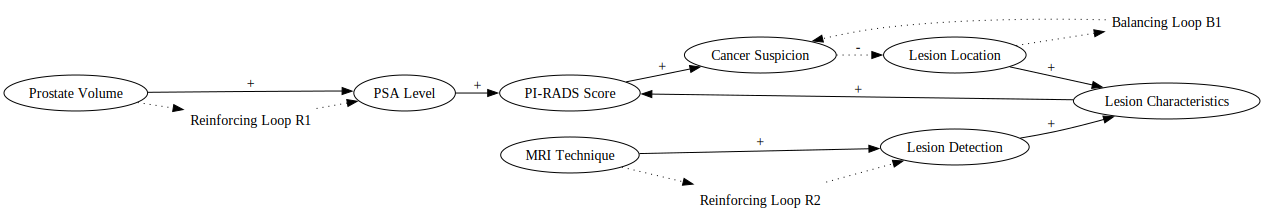

In [51]:
rendered_diagram

In [63]:
# Assuming responses["Final_Output"] and openai_output are strings
combined_output = f"""
{responses["Final_Output"]}

---

{openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(combined_output)

print(f"Output successfully saved to {file_name}")



Output successfully saved to combined_output.md


## Testing with Different Examples

### Case #3

"The United States responds to a perceived Threat to Americans by increasing U.S. military activities, which increases the Perceived Aggressiveness of the U.S., which leads to more Terrorist Recruits, which eventually leads to more Terrorist Activities and increases the Threat to the United States, which leads to more U.S. military activities, which increases the Terrorist Recruits."

- number of links in the text: 6
- number of loops in the text: 1

In [64]:
case03 = r'''
The United States responds to a perceived Threat to Americans by increasing U.S. military activities, which increases the Perceived Aggressiveness of the U.S., which leads to more Terrorist Recruits, which eventually leads to more Terrorist Activities and increases the Threat to the United States, which leads to more U.S. military activities, which increases the Terrorist Recruits.
'''

case03_responses = process_case_study(case03, system_messages)
case03_openai_output = call_openai_for_cld(case03_responses["Final_Output"])

case03_graphviz_script = extract_graphviz_script(case03_openai_output)

In [66]:
case03_rendered_diagram = render_graphviz(case03_graphviz_script, output_file = "case03_causal_loop_diagram")
case03_rendered_diagram.view()

'case03_causal_loop_diagram.pdf'

In [68]:
case03_output = f"""
{case03_responses["Final_Output"]}

---

{case03_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case03_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case03_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case03_combined_output.md


### Case #7

"we consider the impact of implemented components on the carry-out and store operations. Some components may lead to new costs, e.g., for acquiring healthier ingredients and finding new suppliers. Benefits may also ensue, including financial benefits due to increased sales or incentives for participation in the study, reputational benefits, and the personal satisfaction of making a contribution to community health. An increase in motivation due to observation of such benefits can lead to further implementation of components, and thus even more benefits… On the other hand, if the storeowner perceives the costs (both financial and time costs) to exceed those benefits, then a balancing loop may dominate which reduces motivation in response to progress, and slows down further implementation.
"

- number of links in the text: 8
- number of loops in the text: 2

In [70]:
case07 = r"""
we consider the impact of implemented components on the carry-out and store operations. Some components may lead to new costs, e.g., for acquiring healthier ingredients and finding new suppliers. Benefits may also ensue, including financial benefits due to increased sales or incentives for participation in the study, reputational benefits, and the personal satisfaction of making a contribution to community health. An increase in motivation due to observation of such benefits can lead to further implementation of components, and thus even more benefits… On the other hand, if the storeowner perceives the costs (both financial and time costs) to exceed those benefits, then a balancing loop may dominate which reduces motivation in response to progress, and slows down further implementation.
"""

In [71]:
case07_responses = process_case_study(case07, system_messages)
case07_openai_output = call_openai_for_cld(case07_responses["Final_Output"])

case07_graphviz_script = extract_graphviz_script(case07_openai_output)

In [72]:
case07_rendered_diagram = render_graphviz(case07_graphviz_script, output_file = "case07_causal_loop_diagram")
case07_rendered_diagram.view()

'case07_causal_loop_diagram.pdf'

In [73]:
case07_output = f"""
{case07_responses["Final_Output"]}

---

{case07_openai_output}
"""

# Save the combined content to a Markdown file with UTF-8 encoding
file_name = "case07_combined_output.md"

with open(file_name, "w", encoding="utf-8") as file:
    file.write(case07_output)

print(f"Output successfully saved to {file_name}")


Output successfully saved to case07_combined_output.md
